In [1]:
import pandas as pd
import numpy as np

In [2]:
pc_data = pd.read_csv('Data/pc_data (regression).csv', index_col=0)

# Looking at the Data #

In [3]:
pc_data.head()

,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,Weight,Price ($)
Product ID,,,,,,,,,,,
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568.93416
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394.77616
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531.80000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,6759.76680
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4804.79040


The prediction task is defined by predicting the price of the laptop

All of the columns except Product ID and Price ($) are features

# Printing Null Values #

In [4]:
print("PC Data")
for i in pc_data.columns:
    print(f'{i}: {len(pc_data[pc_data[i].isna() == True])}')

PC Data
Brand: 0
Type: 0
Screen Size: 0
Screen Specs: 0
CPU: 0
RAM: 0
Hard Disk: 0
GPU: 0
Operating System: 0
Weight: 0
Price ($): 0


# Visual EDA #

array([[<AxesSubplot:xlabel='Screen Size', ylabel='Screen Size'>,
        <AxesSubplot:xlabel='Price ($)', ylabel='Screen Size'>],
       [<AxesSubplot:xlabel='Screen Size', ylabel='Price ($)'>,
        <AxesSubplot:xlabel='Price ($)', ylabel='Price ($)'>]],
      dtype=object)

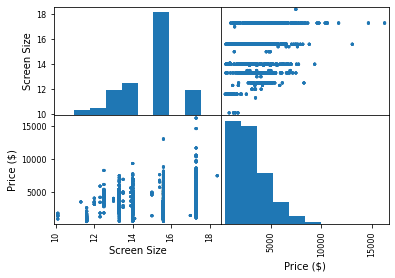

In [5]:
pd.plotting.scatter_matrix(pc_data)

# Grouping the Data #

In [6]:
for i in pc_data.loc[:, ('Screen Specs', 'CPU', 'Hard Disk', 'GPU', 'Weight')]:
    if(i == 'Screen Specs'):
        pc_data_screen = pc_data[i].values
        pc_data_screenDF = pd.DataFrame(columns=['Touchscreen', 'Screen Width', 'Screen Height'])
        for j in range(len(pc_data_screen)):
            isTouchscreen = pc_data_screen[j].find("Touchscreen")

            if(isTouchscreen == -1):
                pc_data_screenDF.loc[j, 'Touchscreen'] = 0
            else:
                pc_data_screenDF.loc[j, 'Touchscreen'] = 1

            screenWidth = int(pc_data_screen[j][pc_data_screen[j].find("x") - 4:pc_data_screen[j].find("x")])
            screenHeight = int(pc_data_screen[j][pc_data_screen[j].find("x") + 1:pc_data_screen[j].find("x") + 4])

            pc_data_screenDF.loc[j, 'Screen Width'] = screenWidth
            pc_data_screenDF.loc[j, 'Screen Height'] = screenHeight
        
    if(i == 'CPU'):
        pc_data_cpu = pc_data[i].values
        
        pc_data_cpuDF = pd.DataFrame(columns=['CPU Brand', 'CPU Model', 'CPU Generation', 'CPU Frequency'])

        for j in range(len(pc_data_cpu)):
            if(pc_data_cpu[j][pc_data_cpu[j].find('GHz')-4:pc_data_cpu[j].find('GHz')].find('.') == -1):
                pc_data_cpuDF.loc[j, 'CPU Frequency'] = pc_data_cpu[j][pc_data_cpu[j].find('GHz')-1:pc_data_cpu[j].find('GHz')]
                cpuFrequency = pc_data_cpu[j][pc_data_cpu[j].find('GHz')-1:pc_data_cpu[j].find('GHz')] + 'GHz'
            else:
                pc_data_cpuDF.loc[j, 'CPU Frequency'] = pc_data_cpu[j][pc_data_cpu[j].find('GHz')-4:pc_data_cpu[j].find('GHz')]
                cpuFrequency = pc_data_cpu[j][pc_data_cpu[j].find('GHz')-4:pc_data_cpu[j].find('GHz')] + 'GHz'
                
            if(pc_data_cpu[j].find('Intel') != -1):
                pc_data_cpuDF.loc[j, 'CPU Brand'] = 'Intel'
                
                if(pc_data_cpu[j].find('Core i') != -1):
                    if(pc_data_cpu[j].find('i3') != -1):
                        pc_data_cpuDF.loc[j, 'CPU Model'] = 'Core i3'

                        pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('U')-4:pc_data_cpu[j].find('U')+1]
                    elif(pc_data_cpu[j].find('i5') != -1):
                        pc_data_cpuDF.loc[j, 'CPU Model'] = 'Core i5'

                        if(pc_data_cpu[j].find('U') != -1):
                            pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('U')-4:pc_data_cpu[j].find('U')+1]
                        elif(pc_data_cpu[j].find('HQ') != -1):
                            pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('HQ')-4:pc_data_cpu[j].find('HQ')+2]
                        elif(pc_data_cpu[j].find('7Y54') != -1):
                            pc_data_cpuDF.loc[j, 'CPU Generation'] = '7Y54'
                        else:
                            pc_data_cpuDF.loc[j, 'CPU Generation'] = ''

                    elif(pc_data_cpu[j].find('i7') != -1):
                        pc_data_cpuDF.loc[j, 'CPU Model'] = 'Core i7'

                        if(pc_data_cpu[j].find('U') != -1):
                            pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('U')-4:pc_data_cpu[j].find('U')+1]
                        elif(pc_data_cpu[j].find('HQ') != -1):
                            pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('HQ')-4:pc_data_cpu[j].find('HQ')+2]
                        elif(pc_data_cpu[j].find('HK') != -1):
                            pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('HK')-4:pc_data_cpu[j].find('HK')+2]
                        else:
                            pc_data_cpuDF.loc[j, 'CPU Generation'] = ''
                            
                elif(pc_data_cpu[j].find('Core M') != -1):
                    if(pc_data_cpu[j].find('M3') != -1 or pc_data_cpu[j].find('m3') != -1):
                        pc_data_cpuDF.loc[j, 'CPU Model'] = 'Core M M3'

                        pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('3-')+2:pc_data_cpu[j].find('3-')+5]
                    elif(pc_data_cpu[j].find('M7') != -1 or pc_data_cpu[j].find('m7') != -1):
                        pc_data_cpuDF.loc[j, 'CPU Model'] = 'Core M M7'

                        pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('7-')+2:pc_data_cpu[j].find('7-')+5]
                    else:
                        pc_data_cpuDF.loc[j, 'CPU Model'] = 'Core M'

                        pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('M')+2:pc_data_cpu[j].find('M')+5]

                elif(pc_data_cpu[j].find('Atom') != -1):
                    if(pc_data_cpu[j].find('x5') != -1):
                        pc_data_cpuDF.loc[j, 'CPU Model'] = 'Atom x5'
                    else:
                        pc_data_cpuDF.loc[j, 'CPU Model'] = 'Atom'

                    pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('Z'):pc_data_cpu[j].find('Z')+5]

                elif(pc_data_cpu[j].find('Celeron') != -1):
                    if(pc_data_cpu[j].find('Dual Core') != -1):
                        pc_data_cpuDF.loc[j, 'CPU Model'] = 'Celeron Dual Core'
                    elif(pc_data_cpu[j].find('Quad Core') != -1):
                        pc_data_cpuDF.loc[j, 'CPU Model'] = 'Celeron Quad Core'

                    if(pc_data_cpu[j].find('N') != -1):
                        pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('N'):pc_data_cpu[j].find('N')+5]
                    elif(pc_data_cpu[j].find('U') != -1):
                        pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('U')-4:pc_data_cpu[j].find('U')+1]
                    else:
                        pc_data_cpuDF.loc[j, 'CPU Generation'] = ''

                elif(pc_data_cpu[j].find('Pentium') != -1):
                    if(pc_data_cpu[j].find('Dual Core') != -1):
                        pc_data_cpuDF.loc[j, 'CPU Model'] = 'Pentium Dual Core'
                    elif(pc_data_cpu[j].find('Quad Core') != -1):
                        pc_data_cpuDF.loc[j, 'CPU Model'] = 'Pentium Quad Core'

                    if(pc_data_cpu[j].find('N') != -1):
                        pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('N'):pc_data_cpu[j].find('N')+5]
                    elif(pc_data_cpu[j].find('U') != -1):
                        pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('U')-4:pc_data_cpu[j].find('U')+1]
                    elif(pc_data_cpu[j].find('Y') != -1):
                        pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('Y')-4:pc_data_cpu[j].find('Y')+1]
                    else:
                        pc_data_cpuDF.loc[j, 'CPU Generation'] = ''

                elif(pc_data_cpu[j].find('Xeon') != -1):
                    pc_data_cpuDF.loc[j, 'CPU Model'] = 'Xeon E3'

                    pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('-')+1:pc_data_cpu[j].find('-')+9]
                    
            elif(pc_data_cpu[j].find('AMD') != -1):
                pc_data_cpuDF.loc[j, 'CPU Brand'] = 'AMD'

                if(pc_data_cpu[j].find('Ryzen') != -1):
                    pc_data_cpuDF.loc[j, 'CPU Model'] = 'Ryzen'

                    pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('Ryzen')+6:pc_data_cpu[j].find('Ryzen')+10]
                    
                elif(pc_data_cpu[j].find('FX') != -1):
                    pc_data_cpuDF.loc[j, 'CPU Model'] = 'FX'

                    pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('P')-4:pc_data_cpu[j].find('P')+1]

                elif(pc_data_cpu[j].find('E-Series') != -1):
                    if(pc_data_cpu[j].find('E2') != -1):
                        pc_data_cpuDF.loc[j, 'CPU Model'] = 'E-Series E2'

                        pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('E2-')+3:pc_data_cpu[j].find('E2-')+8].replace(' ', '')
                    else:
                        pc_data_cpuDF.loc[j, 'CPU Model'] = 'E-Series'
                        
                        pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find('E-Series')+9:pc_data_cpu[j].find('E-Series')+14].replace(' ', '')
                elif(pc_data_cpu[j].replace('AMD ', '').find('A') != -1):
                    pc_data_cpuDF.loc[j, 'CPU Model'] = pc_data_cpu[j][pc_data_cpu[j].replace('AMD ', '').find('A'):pc_data_cpu[j].replace('AMD ', '').find('A')+10].replace(' ', '')
                    
                    pc_data_cpuDF.loc[j, 'CPU Generation'] = pc_data_cpu[j][pc_data_cpu[j].find(cpuFrequency)-6:pc_data_cpu[j].find(cpuFrequency)-1].replace(' ', '').replace('-', '')

            elif(pc_data_cpu[j].find('Samsung') != -1):
                pc_data_cpuDF.loc[j, 'CPU Brand'] = 'Samsung'
                pc_data_cpuDF.loc[j, 'CPU Model'] = 'Cortex'
                pc_data_cpuDF.loc[j, 'CPU Generation'] = 'A72&A53'
        
    if(i == 'Hard Disk'):
        pc_data_storage = pc_data[i].values
        pc_data_storageDF = pd.DataFrame(columns=['Storage 1 Type', 'Storage 1', 'Storage 2 Type', 'Storage 2'])
        for j in range(len(pc_data_storage)):
            hasSecondStorage = pc_data_storage[j].find(" + ")
            storageType = ["SSD", "HDD", "Flash Storage", "Hybrid"]

            if(hasSecondStorage == -1):
                for l in storageType:
                    if(pc_data_storage[j].find(l) != -1):
                        pc_data_storageDF.loc[j, 'Storage 1 Type'] = l

                if(pc_data_storage[j].find("GB") != -1):
                    pc_data_storageDF.loc[j, 'Storage 1'] = int(pc_data_storage[j][:pc_data_storage[j].find("GB")])
                elif(pc_data_storage[j].find("TB") != -1):
                    pc_data_storageDF.loc[j, 'Storage 1'] = int(float(pc_data_storage[j][:pc_data_storage[j].find("TB")]) * 1000)

                pc_data_storageDF.loc[j, 'Storage 2 Type'] = ''
                pc_data_storageDF.loc[j, 'Storage 2'] = 0
            else:
                firstStorage = pc_data_storage[j][:hasSecondStorage]
                secondStorage = pc_data_storage[j][hasSecondStorage:].replace(" + ", "")
                
                storageColumns = ['Storage 1 Type', 'Storage 1', 'Storage 2 Type', 'Storage 2']
                currStorage = firstStorage

                for k in storageColumns:
                    if(k == 'Storage 2 Type'): currStorage = secondStorage

                    if(k == 'Storage 1 Type' or k == 'Storage 2 Type'):
                        for l in storageType:
                            if(currStorage.find(l) != -1):
                                pc_data_storageDF.loc[j, k] = l

                    if(k == 'Storage 1' or k == 'Storage 2'):
                        if(currStorage.find("GB") != -1):
                            pc_data_storageDF.loc[j, k] = int(currStorage[:currStorage.find("GB")])
                        if(currStorage.find("TB") != -1):
                            pc_data_storageDF.loc[j, k] = int(float(currStorage[:currStorage.find("TB")]) * 1000)
        
    if(i == 'GPU'):
        pc_data_gpu = pc_data[i].values

        pc_data_gpuDF = pd.DataFrame(columns=['GPU Brand', 'GPU Model', 'GPU Generation'])

        for j in range(len(pc_data_gpu)):
            if(pc_data_gpu[j].find('Intel') != -1):
                pc_data_gpuDF.loc[j, 'GPU Brand'] = 'Intel'

                if(pc_data_gpu[j].find('Iris') != -1):
                    pc_data_gpuDF.loc[j, 'GPU Model'] = 'Iris'
                elif(pc_data_gpu[j].find('HD') != -1):
                    pc_data_gpuDF.loc[j, 'GPU Model'] = 'HD'
                elif(pc_data_gpu[j].find('UHD') != -1):
                    pc_data_gpuDF.loc[j, 'GPU Model'] = 'UHD'
                else:
                    pc_data_gpuDF.loc[j, 'GPU Model'] = 'Graphics'

                if(pc_data_gpu[j][-4:].replace(' ', '') != 'hics'):
                    pc_data_gpuDF.loc[j, 'GPU Generation'] = pc_data_gpu[j][-4:].replace(' ', '')
                else:
                    pc_data_gpuDF.loc[j, 'GPU Generation'] = ''

            elif(pc_data_gpu[j].find('Nvidia') != -1):
                pc_data_gpuDF.loc[j, 'GPU Brand'] = 'Nvidia'

                if(pc_data_gpu[j].find('GTX') != -1):
                    if(pc_data_gpu[j].find('Ti') != -1):
                        pc_data_gpuDF.loc[j, 'GPU Model'] = 'GeForce GTX Ti'

                        pc_data_gpuDF.loc[j, 'GPU Generation'] = pc_data_gpu[j].replace(' Ti', '')[-4:]
                    else:
                        pc_data_gpuDF.loc[j, 'GPU Model'] = 'GeForce GTX'

                        pc_data_gpuDF.loc[j, 'GPU Generation'] = pc_data_gpu[j].replace('M', '').replace('X', '').replace('<U+039C>', '')[-4:].replace(' ', '')
                        
                elif(pc_data_gpu[j].find('MX') != -1):
                    pc_data_gpuDF.loc[j, 'GPU Model'] = 'GeForce MX'

                    if(pc_data_gpu[j].find('MX130') != -1 or pc_data_gpu[j].find('MX150') != -1):
                        pc_data_gpuDF.loc[j, 'GPU Generation'] = pc_data_gpu[j][-3:]
                    else:
                        pc_data_gpuDF.loc[j, 'GPU Generation'] = pc_data_gpu[j][pc_data_gpu[j].find('MX')-3:pc_data_gpu[j].find('MX')]

                elif(pc_data_gpu[j].find('M') != -1):
                    pc_data_gpuDF.loc[j, 'GPU Model'] = 'GeForce M'

                    pc_data_gpuDF.loc[j, 'GPU Generation'] = pc_data_gpu[j][-3:-1]

                elif(pc_data_gpu[j].find('Quadro') != -1):
                    pc_data_gpuDF.loc[j, 'GPU Model'] = 'Quadro M'

                    pc_data_gpuDF.loc[j, 'GPU Generation'] = pc_data_gpu[j][pc_data_gpu[j].find('M')+1:]

                else:
                    pc_data_gpuDF.loc[j, 'GPU Model'] = 'GeForce'

                    pc_data_gpuDF.loc[j, 'GPU Generation'] = pc_data_gpu[j][-3:]
                    
            elif(pc_data_gpu[j].find('AMD') != -1):
                pc_data_gpuDF.loc[j, 'GPU Brand'] = 'AMD'

                if(pc_data_gpu[j].find('FirePro') != -1):
                    pc_data_gpuDF.loc[j, 'GPU Model'] = 'FirePro'

                    pc_data_gpuDF.loc[j, 'GPU Generation'] = pc_data_gpu[j][pc_data_gpu[j].find('W'):]
                else:
                    if(pc_data_gpu[j].find('R17M-M1-70') != -1):
                        pc_data_gpuDF.loc[j, 'GPU Model'] = 'Radeon R7'

                        pc_data_gpuDF.loc[j, 'GPU Generation'] = '530'

                    if(pc_data_gpu[j].find('Radeon') != -1 or pc_data_gpu[j].find('R4') != -1):
                        if(pc_data_gpu[j].find('Pro') != -1):
                            pc_data_gpuDF.loc[j, 'GPU Model'] = 'Radeon Pro'

                            if(pc_data_gpu[j][-3:] != 'ics'):
                                pc_data_gpuDF.loc[j, 'GPU Generation'] = pc_data_gpu[j][-3:]
                            else:
                                pc_data_gpuDF.loc[j, 'GPU Generation'] = ''
                        elif(pc_data_gpu[j].find('RX') != -1):
                            pc_data_gpuDF.loc[j, 'GPU Model'] = 'Radeon RX'

                            pc_data_gpuDF.loc[j, 'GPU Generation'] = pc_data_gpu[j][-3:]
                        elif(pc_data_gpu[j].find('R2') != -1):
                            pc_data_gpuDF.loc[j, 'GPU Model'] = 'Radeon R2'

                            pc_data_gpuDF.loc[j, 'GPU Generation'] = ''
                        elif(pc_data_gpu[j].find('R3') != -1):
                            pc_data_gpuDF.loc[j, 'GPU Model'] = 'Radeon R3'

                            pc_data_gpuDF.loc[j, 'GPU Generation'] = ''
                        elif(pc_data_gpu[j].find('R4') != -1):
                            pc_data_gpuDF.loc[j, 'GPU Model'] = 'Radeon R4'

                            pc_data_gpuDF.loc[j, 'GPU Generation'] = ''
                        elif(pc_data_gpu[j].find('R5') != -1):
                            pc_data_gpuDF.loc[j, 'GPU Model'] = 'Radeon R5'

                            if(pc_data_gpu[j][-4:] != 'n R5'):
                                pc_data_gpuDF.loc[j, 'GPU Generation'] = pc_data_gpu[j][-4:].replace('M', '').replace(' ', '')
                            else:
                                pc_data_gpuDF.loc[j, 'GPU Generation'] = ''
                        elif(pc_data_gpu[j].find('R7') != -1):
                            pc_data_gpuDF.loc[j, 'GPU Model'] = 'Radeon R7'

                            if(pc_data_gpu[j][-4:] != 'n R7' or pc_data_gpu[j][-4:] != 'hics'):
                                pc_data_gpuDF.loc[j, 'GPU Generation'] = pc_data_gpu[j][-4:].replace('M', '').replace(' ', '')
                            else:
                                pc_data_gpuDF.loc[j, 'GPU Generation'] = ''
                        elif(pc_data_gpu[j].find('R9') != -1):
                            pc_data_gpuDF.loc[j, 'GPU Model'] = 'Radeon R9'

                            pc_data_gpuDF.loc[j, 'GPU Generation'] = pc_data_gpu[j][-3:]
                        else:
                            pc_data_gpuDF.loc[j, 'GPU Model'] = 'Radeon'

                            pc_data_gpuDF.loc[j, 'GPU Generation'] = pc_data_gpu[j][-3:]
                        
            elif(pc_data_gpu[j].find('ARM') != -1):
                pc_data_gpuDF.loc[j, 'GPU Brand'] = 'ARM'

                pc_data_gpuDF.loc[j, 'GPU Model'] = 'Mali MP4'

                pc_data_gpuDF.loc[j, 'GPU Generation'] = 'T860'
        
    if(i == 'Weight'):
        pc_data_weight = pc_data[i].values
        for j in range(len(pc_data_weight)):
            pc_data_weight[j] = float(pc_data_weight[j][:-2])

        pc_data[i] = pc_data_weight
        

In [7]:
pc_data = pd.concat([pc_data, pc_data_storageDF], axis=1)
pc_data = pc_data.drop('Hard Disk', axis=1)

pc_data = pd.concat([pc_data, pc_data_screenDF], axis=1)
pc_data = pc_data.drop('Screen Specs', axis=1)

pc_data = pd.concat([pc_data, pc_data_gpuDF], axis=1)
pc_data = pc_data.drop('GPU', axis=1)

pc_data = pd.concat([pc_data, pc_data_cpuDF], axis=1)
pc_data = pc_data.drop('CPU', axis=1)

pc_data

,Brand,Type,Screen Size,RAM,Operating System,Weight,Price ($),Storage 1 Type,Storage 1,Storage 2 Type,...,Touchscreen,Screen Width,Screen Height,GPU Brand,GPU Model,GPU Generation,CPU Brand,CPU Model,CPU Generation,CPU Frequency
0,Apple,Ultrabook,13.3,8GB,macOS,1.37,3568.93416,SSD,128,,...,0,2560,160,Intel,Iris,640,Intel,Core i5,,2.3
1,Apple,Ultrabook,13.3,8GB,macOS,1.34,2394.77616,Flash Storage,128,,...,0,1440,900,Intel,HD,6000,Intel,Core i5,,1.8
2,HP,Notebook,15.6,8GB,No OS,1.86,1531.80000,SSD,256,,...,0,1920,108,Intel,HD,620,Intel,Core i5,7200U,2.5
3,Apple,Ultrabook,15.4,16GB,macOS,1.83,6759.76680,SSD,512,,...,0,2880,180,AMD,Radeon Pro,455,Intel,Core i7,,2.7
4,Apple,Ultrabook,13.3,8GB,macOS,1.37,4804.79040,SSD,256,,...,0,2560,160,Intel,Iris,650,Intel,Core i5,,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15315,Lenovo,2 in 1 Convertible,14.0,4GB,Windows 10,1.8,1706.40200,SSD,128,,...,1,1920,108,Intel,HD,520,Intel,Core i7,6500U,2.5
15316,Lenovo,2 in 1 Convertible,13.3,16GB,Windows 10,1.3,4000.10600,SSD,512,,...,1,3200,180,Intel,HD,520,Intel,Core i7,6500U,2.5
15317,Lenovo,Notebook,14.0,2GB,Windows 10,1.5,616.82600,Flash Storage,64,,...,0,1366,768,Intel,HD,,Intel,Celeron Dual Core,N3050,1.6
15318,HP,Notebook,15.6,6GB,Windows 10,2.19,2042.06600,HDD,1000,,...,0,1366,768,AMD,Radeon R5,330,Intel,Core i7,6500U,2.5


# Checking for leftover Null Values #

In [8]:
print("PC Data")
for i in pc_data.columns:
    print(f'{i}: {len(pc_data[pc_data[i].isna() == True])}')

PC Data
Brand: 0
Type: 0
Screen Size: 0
RAM: 0
Operating System: 0
Weight: 0
Price ($): 0
Storage 1 Type: 0
Storage 1: 0
Storage 2 Type: 0
Storage 2: 0
Touchscreen: 0
Screen Width: 0
Screen Height: 0
GPU Brand: 0
GPU Model: 0
GPU Generation: 0
CPU Brand: 0
CPU Model: 0
CPU Generation: 0
CPU Frequency: 0


# Training the Model (PC_Data) #

I chose K Nearest Neighbors, Decision Tree and Logistic Regression because they are quite reliable

I chose SVR because I wanted to experiment because I know that support vector machines don't scale well to the number of samples

I chose ensemble methods like Ada Boost and Stacking because I wanted to know whether can I get a better performance

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor

In [10]:
pc_data = pd.get_dummies(pc_data, columns=pc_data.drop(['Screen Size', 'Weight', 'Price ($)', 'Storage 1', 'Storage 2', 'Touchscreen', 'Screen Width', 'Screen Height', 'CPU Frequency'], axis=1).columns)

X_train, X_test, y_train, y_test = train_test_split(pc_data.drop(['Price ($)'], axis=1), pc_data['Price ($)'],
test_size=0.3, random_state=42)

X_train = X_train.reset_index()
X_test = X_test.reset_index()

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)

pc_dataX = scaler.transform(X_train)
pc_dataXTest = scaler.transform(X_test)

dummyReg = DummyRegressor()

knnReg = KNeighborsRegressor()

treeReg = DecisionTreeRegressor()

ridge = Ridge()
lasso = Lasso(tol=1.0, max_iter=1500)

svr = SVR()

adaBoostReg = AdaBoostRegressor(random_state=42)

estimators = [('knn', knnReg), ('tree', treeReg), ('ridge', ridge), ('lasso', lasso)]
stackingReg = StackingRegressor(estimators=estimators)

When choosing the parameters for hyper-tuning, I looked at the documentation and picked the ones that I think would affect the model the most

The range of values I decided for the tuning was based on whether I thought the values would make a significant difference to the model when training it

In [12]:
knnParams = {'n_neighbors': np.linspace(1, 10, 10, dtype=int)}

treeParams = {'max_depth': np.linspace(1, 10, 10, dtype=int),
              'min_samples_split': np.linspace(2, 6, 5, dtype=int),
              'min_samples_leaf': np.linspace(1, 5, 5, dtype=int)}

svrParams = {'C': np.linspace(1, 10, 10), 'epsilon': np.linspace(0.2, 1, 5)}

ridgeParams = {'alpha': np.linspace(0.1, 1, 25)}
lassoParams = {'alpha': np.linspace(0.1, 1, 25)}

adaBoostParams = {'base_estimator': [knnReg, treeReg, ridge, lasso], 'n_estimators': np.linspace(1, 10, 10, dtype=int),
'learning_rate': np.linspace(0.1, 1, 10)}
stackingParams = {'final_estimator': [knnReg, treeReg, ridge, lasso]}

In [13]:
knnGrid = GridSearchCV(knnReg, knnParams, cv=5)

treeGrid = GridSearchCV(treeReg, treeParams, cv=5)

svrGrid = GridSearchCV(svr, svrParams, cv=5)

ridgeGrid = GridSearchCV(ridge, ridgeParams, cv=5)
lassoGrid = GridSearchCV(lasso, lassoParams, cv=5)

adaBoostGrid = GridSearchCV(adaBoostReg, adaBoostParams, cv=5)
stackingGrid = GridSearchCV(stackingReg, stackingParams, cv=5)

In [14]:
dummyReg.fit(pc_dataX, y_train)

knnGrid.fit(pc_dataX, y_train)

treeGrid.fit(pc_dataX, y_train)

ridgeGrid.fit(pc_dataX, y_train)
lassoGrid.fit(pc_dataX, y_train)

svrGrid.fit(pc_dataX[:5000], y_train[:5000])

adaBoostGrid.fit(pc_dataX, y_train)
stackingGrid.fit(pc_dataX, y_train)

GridSearchCV(cv=5,
             estimator=StackingRegressor(estimators=[('knn',
                                                      KNeighborsRegressor()),
                                                     ('tree',
                                                      DecisionTreeRegressor()),
                                                     ('ridge', Ridge()),
                                                     ('lasso',
                                                      Lasso(max_iter=1500,
                                                            tol=1.0))]),
             param_grid={'final_estimator': [KNeighborsRegressor(),
                                             DecisionTreeRegressor(), Ridge(),
                                             Lasso(max_iter=1500, tol=1.0)]})

In [15]:
print(f'Best Params knn: {knnGrid.best_params_}')

print(f'Best Params tree: {treeGrid.best_params_}')

print(f'Best Params ridge: {ridgeGrid.best_params_}')
print(f'Best Params lasso: {lassoGrid.best_params_}')

print(f'Best Params SVR: {svrGrid.best_params_}')

print(f'Best Params Ada Boost: {adaBoostGrid.best_params_}')
print(f'Best Params Stacking: {stackingGrid.best_params_}')

Best Params knn: {'n_neighbors': 2}
Best Params tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best Params ridge: {'alpha': 1.0}
Best Params lasso: {'alpha': 1.0}
Best Params SVR: {'C': 10.0, 'epsilon': 0.2}
Best Params Ada Boost: {'base_estimator': DecisionTreeRegressor(), 'learning_rate': 0.2, 'n_estimators': 8}
Best Params Stacking: {'final_estimator': KNeighborsRegressor()}


In [16]:
dummyReg_Y_Pred = dummyReg.predict(pc_dataXTest)

knn_Y_pred = knnGrid.predict(pc_dataXTest)

tree_Y_pred = treeGrid.predict(pc_dataXTest)

ridge_Y_pred = ridgeGrid.predict(pc_dataXTest)
lasso_Y_pred = lassoGrid.predict(pc_dataXTest)

svr_Y_pred = svrGrid.predict(pc_dataXTest)

adaBoost_Y_pred = adaBoostGrid.predict(pc_dataXTest)
stacking_Y_pred = stackingGrid.predict(pc_dataXTest)

I evaluate the quality of my system by using Cross Val Score, Mean Absolute Error, Mean Squared Error and R2 Score

In [17]:
print(f'Cross Val Score for Dummy Regressor: {cross_val_score(dummyReg, pc_dataXTest, y_test)}')

print(f'Cross Val Score for knn: {cross_val_score(knnGrid, pc_dataXTest, y_test)}')

print(f'Cross Val Score for tree: {cross_val_score(treeGrid, pc_dataXTest, y_test)}')

print(f'Cross Val Score for ridge: {cross_val_score(ridgeGrid, pc_dataXTest, y_test)}')
print(f'Cross Val Score for lasso: {cross_val_score(lassoGrid, pc_dataXTest, y_test)}')

print(f'Cross Val Score for SVR: {cross_val_score(svrGrid, pc_dataXTest[:5000], y_test[:5000])}')

print(f'Cross Val Score for Ada Boosting: {cross_val_score(adaBoostGrid, pc_dataXTest, y_test, cv=3)}')
print(f'Cross Val Score for Stacking: {cross_val_score(stackingGrid, pc_dataXTest, y_test, cv=3)}')

Cross Val Score for Dummy Regressor: [-3.59992436e-04 -2.98317846e-03 -2.69648573e-03 -4.68120074e-07
 -4.65734072e-04]
Cross Val Score for knn: [0.96061538 0.9712261  0.97830727 0.97343765 0.97063293]
Cross Val Score for tree: [0.90948244 0.9082926  0.94097106 0.88468056 0.92153869]
Cross Val Score for ridge: [0.88748851 0.85880261 0.88371245 0.86175567 0.86994789]
Cross Val Score for lasso: [0.82141298 0.76093935 0.83625964 0.77622835 0.80072926]
Cross Val Score for SVR: [0.18135368 0.21036353 0.13250696 0.21682108 0.18810606]
Cross Val Score for Ada Boosting: [0.98144903 0.98391557 0.94489063]
Cross Val Score for Stacking: [0.97310667 0.97680915 0.94825889]


In [18]:
print(f'Mean Absolute Error for Dummy Regressor: {mean_absolute_error(y_test, dummyReg_Y_Pred)}')

print(f'Mean Absolute Error for knn: {mean_absolute_error(y_test, knn_Y_pred)}')

print(f'Mean Absolute Error for tree: {mean_absolute_error(y_test, tree_Y_pred)}')

print(f'Mean Absolute Error for ridge: {mean_absolute_error(y_test, ridge_Y_pred)}')
print(f'Mean Absolute Error for lasso: {mean_absolute_error(y_test, lasso_Y_pred)}')

print(f'Mean Absolute Error for SVR: {mean_absolute_error(y_test, svr_Y_pred)}')

print(f'Mean Absolute Error for Ada Boosting: {mean_absolute_error(y_test, adaBoost_Y_pred)}')
print(f'Mean Absolute Error for Stacking: {mean_absolute_error(y_test, stacking_Y_pred)}')

Mean Absolute Error for Dummy Regressor: 1445.5563734304192
Mean Absolute Error for knn: 59.536662080069625
Mean Absolute Error for tree: 311.59304212486956
Mean Absolute Error for ridge: 460.48837238531576
Mean Absolute Error for lasso: 606.4591769317675
Mean Absolute Error for SVR: 1040.4080682849583
Mean Absolute Error for Ada Boosting: 29.95748027850304
Mean Absolute Error for Stacking: 22.93483625413402


In [19]:
print(f'Mean Squared Error for Dummy Regressor: {mean_squared_error(y_test, dummyReg_Y_Pred)}')

print(f'Mean Squared Error for knn: {mean_squared_error(y_test, knn_Y_pred)}')

print(f'Mean Squared Error for tree: {mean_squared_error(y_test, tree_Y_pred)}')

print(f'Mean Squared Error for ridge: {mean_squared_error(y_test, ridge_Y_pred)}')
print(f'Mean Squared Error for lasso: {mean_squared_error(y_test, lasso_Y_pred)}')

print(f'Mean Squared Error for SVR: {mean_squared_error(y_test, svr_Y_pred)}')

print(f'Mean Squared Error for Ada Boosting: {mean_squared_error(y_test, adaBoost_Y_pred)}')
print(f'Mean Squared Error for Stacking: {mean_squared_error(y_test, stacking_Y_pred)}')

Mean Squared Error for Dummy Regressor: 3691223.687829787
Mean Squared Error for knn: 31718.50104585255
Mean Squared Error for tree: 236366.02456993336
Mean Squared Error for ridge: 450495.87337814394
Mean Squared Error for lasso: 694136.1567795437
Mean Squared Error for SVR: 2899991.888095494
Mean Squared Error for Ada Boosting: 14826.876399284625
Mean Squared Error for Stacking: 5358.310836107158


In [20]:
print(f'R2 Score for Dummy Regressor: {r2_score(y_test, dummyReg_Y_Pred)}')

print(f'R2 Score for knn: {r2_score(y_test, knn_Y_pred)}')

print(f'R2 Score for tree: {r2_score(y_test, tree_Y_pred)}')

print(f'R2 Score for ridge: {r2_score(y_test, ridge_Y_pred)}')
print(f'R2 Score for lasso: {r2_score(y_test, lasso_Y_pred)}')

print(f'R2 Score for SVR: {r2_score(y_test, svr_Y_pred)}')

print(f'R2 Score for Ada Boosting: {r2_score(y_test, adaBoost_Y_pred)}')
print(f'R2 Score for Stacking: {r2_score(y_test, stacking_Y_pred)}')

R2 Score for Dummy Regressor: -0.0016261300299622583
R2 Score for knn: 0.9913930766218106
R2 Score for tree: 0.9358612735280358
R2 Score for ridge: 0.8777564091458481
R2 Score for lasso: 0.811643787744075
R2 Score for SVR: 0.21307731591331358
R2 Score for Ada Boosting: 0.9959766765484268
R2 Score for Stacking: 0.9985460040896564


Dummy Regressor is really bad compared to the other machine learning models as they would get above 0 in terms of R2 Score

Most models when predicting the price of the laptop would be moderately off the mark